<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [14]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [15]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [16]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [17]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


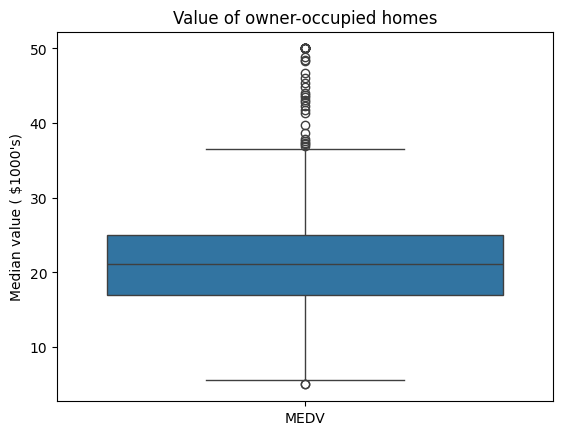

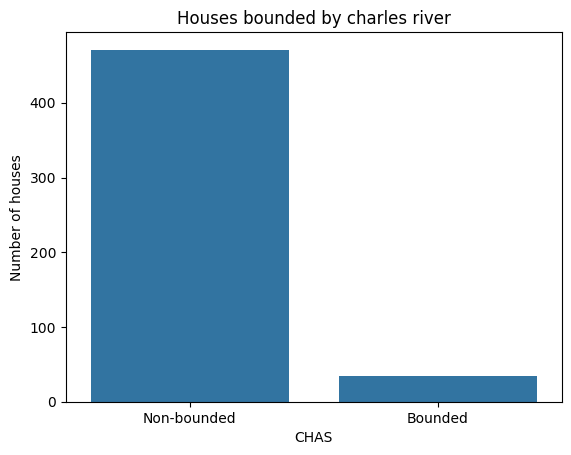

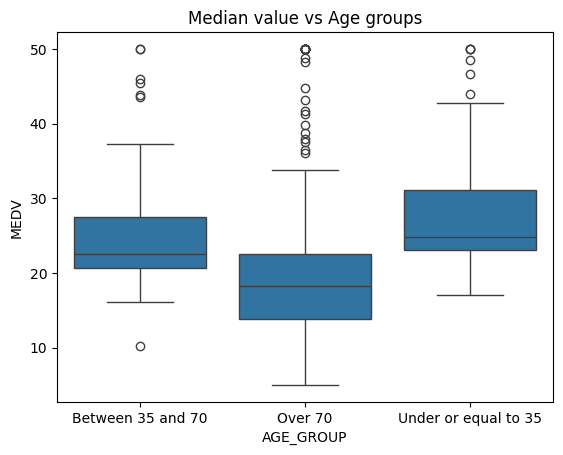

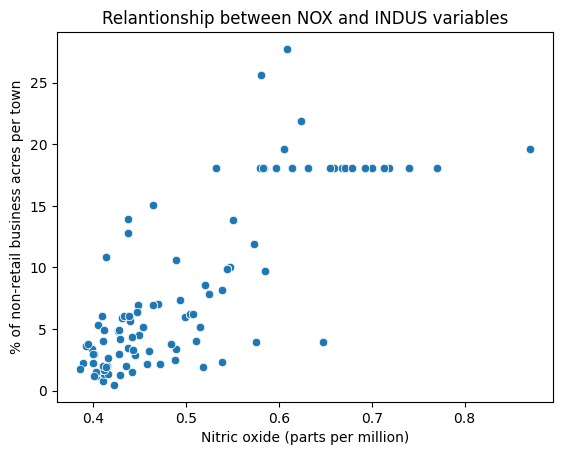

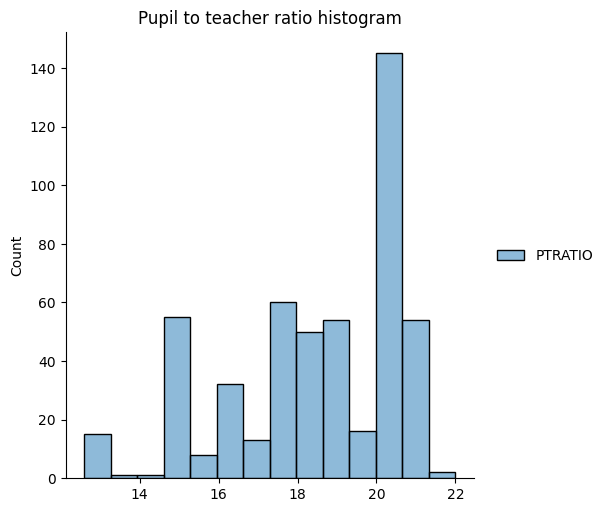

In [18]:
#Task 2

# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(data=boston_df[['MEDV']])
pyplot.title('Value of owner-occupied homes')
pyplot.ylabel("Median value ( $1000's)")
pyplot.show()

# Provide a  bar plot for the Charles river variable
#display(boston_df['CHAS'].value_counts())

boston_chas_df=boston_df.groupby('CHAS',as_index=False).agg(count=('CHAS', 'count'))
#display(boston_chas_df)

sns.barplot(x=boston_chas_df.index.map({0: 'Non-bounded', 1: 'Bounded'}), y=boston_chas_df['count'])
pyplot.title('Houses bounded by charles river')
pyplot.ylabel("Number of houses")
pyplot.xlabel("CHAS")
pyplot.show()

# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df['AGE_GROUP']=''
boston_df.loc[boston_df['AGE']<=35,'AGE_GROUP']='Under or equal to 35'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'AGE_GROUP']='Between 35 and 70'
boston_df.loc[boston_df['AGE']>=70,'AGE_GROUP']='Over 70'

sns.boxplot(data=boston_df, x='AGE_GROUP', y='MEDV')
pyplot.title('Median value vs Age groups')
pyplot.show()

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
# Discussion: It looks like there is some positive correlation between NOX and INDUS (the larger the former, the larger the latter). This may suggest that non-retail business could be linked to this type of pollution particles
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
pyplot.title('Relantionship between NOX and INDUS variables')
pyplot.xlabel("Nitric oxide (parts per million)")
pyplot.ylabel("% of non-retail business acres per town")
pyplot.show()

# Create a histogram for the pupil to teacher ratio variable
sns.displot(boston_df[['PTRATIO']])
pyplot.title('Pupil to teacher ratio histogram')
pyplot.show()

In [39]:
# Task 3

#For each of the following questions;

# Be sure to:
# State your hypothesis.

# Use α = 0.05

# Perform the test Statistics.

# State the conclusion from the test.


###################################################################################################################################################################
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
###################################################################################################################################################################

bounded_df=boston_df[boston_df['CHAS']==1.0][['MEDV']]
non_bounded_df=boston_df[boston_df['CHAS']==0.0][['MEDV']]

ALPHA=0.5
# We need to check first if variances in both groups are equal or not. We use a levene test for this.
varTest=scipy.stats.levene(bounded_df, non_bounded_df, center='median')
display(varTest)
if varTest.pvalue < ALPHA:
    eqVar=False
else:
    eqVar=True
# The p-value for levene test is quite below alpha (0.5), suggesting that that the variances in both groups (bounded, non-bounded) are NOT the same, so we need to take this into account and make sure we call the t-test with the right parameters.

# T-TEST NULL-HYPOTHESIS: both bounded and non-bounded houses by Charles river belong to the same group in terms of median value, meaning the mean of median house values for river-bounded houses is the same as the mean of median house values for non-river-bounded houses.
res=scipy.stats.ttest_ind(bounded_df,non_bounded_df, equal_var=eqVar, random_state=1)  
display(res)

if res.pvalue < ALPHA:
    print("We reject the null hypthesis: Whether houses are bounded by Charles river or not is statiscally significant for their median value")
else:
    print("We fail to reject the null hypothesis, so the the median value of houses does not look like to be related to their their location with respect to the Charles river")

# DISCUSSION AND CONCLUSION: The p-value obtained is as low as 0.0035 (far away from 0.5), which means we have a strong evidence to reject the null hypothesis. 
# As a location, the Charles river seems like it is related to the median value of houses.


###################################################################################################################################################################
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
###################################################################################################################################################################

younger_df=boston_df[boston_df['AGE_GROUP']=='Under or equal to 35'][['MEDV']]
middleage_df=boston_df[boston_df['AGE_GROUP']=='Between 35 and 70'][['MEDV']]
senior_df=boston_df[boston_df['AGE_GROUP']=='Over 70'][['MEDV']]


# We need to check first if variances in all groups are equal or not. We use a levene test for this.
varTest=scipy.stats.levene(younger_df, middleage_df, senior_df, center='median')
display(varTest)
if varTest.pvalue < ALPHA:
    eqVar=False
else:
    eqVar=True
# The p-value for levene test is quite below alpha (0.5), suggesting that that the variances in all 3 groups (younger_df, middleage_df, senior_df) are NOT the same. This fact might influence the accuracy of the results obtained for the ANOVA test (see NOTE below).

# ANOVA NULL-HYPOTHESIS: Median value of houses are independent of the age group (<=35, 35-70, >=70) that owners belong. In other words, the mean of the median value of houses associated to each age group is the same.
res=scipy.stats.f_oneway(younger_df, middleage_df, senior_df)  
display(res)

if res.pvalue < ALPHA:
    print("We reject the null hypthesis:: There is evidence that the mean of the median value of houses is differtnt per age group")
else:
    print("We fail to reject the null hypothesis, so the the median value of houses does not look like to be influenced by the onwer's age group")

# DISCUSSION AND CONCLUSION: The p-value obtained is extremely low (1.7 * 10^-15), which means we have a very strong evidence to reject the null hypothesis. 
# In summary, the median values of houses differ acccording to the owner's age group.
# NOTE: Notice that One ANOVA's requirement is that variances are equal, which is not the case here as show above. This might incur inconsistencies in the results obtained.
# Nevertheless, as no specific intstructions were given about how we should proceeed, so we just ignored this fact for the purpose of this exercise. 



###################################################################################################################################################################
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
###################################################################################################################################################################
pollution_df=boston_df['NOX']
nonretailbusiness_df=boston_df['INDUS']


# PEARSON CORRELATION NULL-HYPOTHESIS: Nitric oxide levels and the proportion of non-retail business acres are totally independent, meaning they are not related to each other at all.
res=scipy.stats.pearsonr(pollution_df, nonretailbusiness_df)
display(res)

if res.pvalue < ALPHA:
    print("We reject the null-hypothesis: There is statistical evidence that pollution and non-retail business are related to each other")
else:
    print("We fail to reject the null hypothesis, so there seems not to be correlation between pollution and non-retail business")

# DISCUSSION AND CONCLUSION: The p-value obtained is extremely low (7.91 * 10^-98), which means we have a very strong evidence to reject the null hypothesis. 
# In summary, the statement that both nitric oxide pollution measures and the proportion of non-retail acres are related is stastical significant. Therefore, we refute the conclusion suggested in the question. 



###################################################################################################################################################################
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
###################################################################################################################################################################

Y = boston_df['MEDV']
X = boston_df['DIS']
X = sm.add_constant(X)


# REGRESSION  NULL-HYPOTHESIS: There is no relationship between the median value of housers and their distance to five boston employment centers. In other words, the slope of the regression line (coefficient 1) that explores how one variable (MEDV) changes across the values of the other (DIS) is 0.

model = sm.OLS(Y,X)
results = model.fit()
display(results.pvalues)

if results.pvalues['DIS'] < ALPHA:
    print("We reject the null-hypothesis: There is statistical evidence that changes in the wighted distance of houses to five boston employment centers does bring relative changes in their median values")
else:
    print("We fail to reject the null hypothesis, so there seems not to be changes in the median value of houses which are proportionally related to changes in their weighted distance to five boston employment centers")

display(results.summary())

# DISCUSSION AND CONCLUSION: The p-value obtained for the regression coefficient of DIS variable (the slope) is way below 0.5 (1.2 * 10^-8), which means we have a very strong evidence to reject the null hypothesis.
# This coefficient of DIS is 1,0916, therefore for every additional unit in the weighted distance, the median value of the house is approxiamtely increased by 1.0916 x 1000$ = 1091.6$. 



LeveneResult(statistic=array([4.59034222]), pvalue=array([0.03263098]))

TtestResult(statistic=array([3.11329131]), pvalue=array([0.00356717]), df=array([36.8764088]))

We reject the null hypthesis: Whether houses are bounded by Charles river or not is statiscally significant for their median value


LeveneResult(statistic=array([3.47182089]), pvalue=array([0.03180678]))

F_onewayResult(statistic=array([36.40764999]), pvalue=array([1.7105011e-15]))

We reject the null hypthesis:: There is evidence that the mean of the median value of houses is differtnt per age group


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

There is statistical evidence that pollution and non-retail business are related to each other


const    4.008955e-78
DIS      1.206612e-08
dtype: float64

We reject the null-hypothesis, as there is statistical evidence that median value of houses and their distance to five boston employment centers


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:50:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""